Имеем датасет из 5 переменных и 50 записей.

# Data Preprocessing

Импортируем необходимые библиотеки и присваиваем им сокращенные названия.

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Importing the dataset
df = pd.read_csv('task1grin.csv', sep=',')

Выведем импортрованнные данные на экран. 

In [13]:
df

,Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Выведем статистику по числовым переменным.

In [834]:
df.describe()

,Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [835]:
df.dtypes

Spend              float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Проверяем наличие пропусков, их нет, движемся дальше.

In [14]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Profit,0,0.0
State,0,0.0
Marketing Spend,0,0.0
Administration,0,0.0
Spend,0,0.0


Обрабатываем выбросы с помощью цикла for и условного ветвления if.

In [16]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Так как статистика не поменялась, можно сделать вывод, что выбросов не было.

In [17]:
# Outliers
df = outliers(df)
df.describe()

,Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Построим графики распределения функций.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


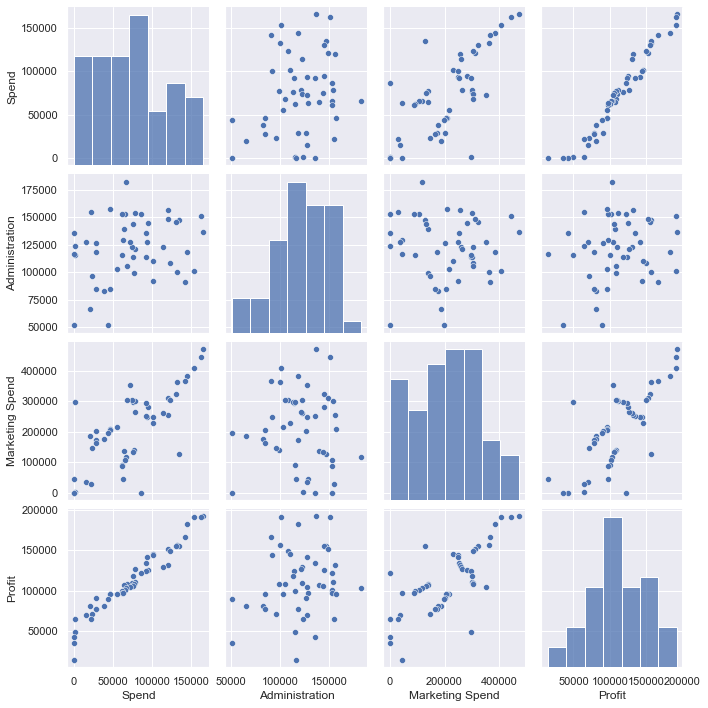

In [18]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Закодируем категориальные переменные и выведем их.

In [19]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [20]:
# Encoding categorical data
df = encoding_char(df)

In [21]:
df

,Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


Данные подготовлены.

# Linear Regression

Построим многофакторную линейную регрессию. Выведем корреляционную матрицу для выявления наиболее значимых факторов.

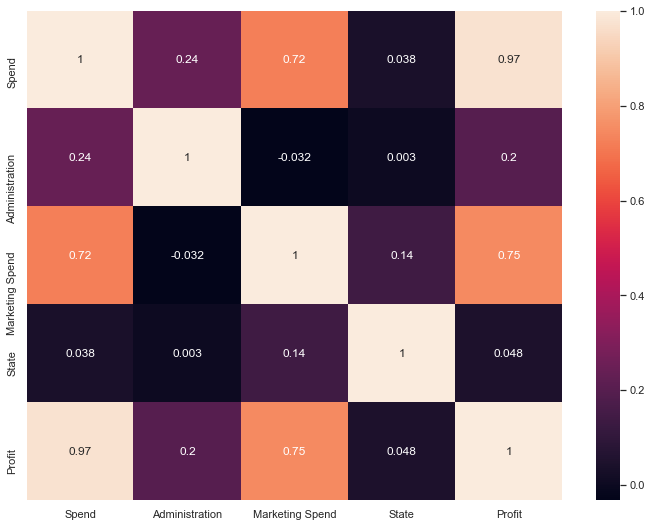

In [22]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [23]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу.

In [24]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.08e-20
Time:                        20:41:10   Log-Likelihood:                -423.98
No. Observations:                  40   AIC:                             858.0
Df Residuals:                      35   BIC:                             866.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.925e+04   8266.208      5.958      0.000    3.25e+04     6.6e+04
x1             0.8059      0.058     13.978      0.000       0.689       0.923
x2            -0.0179      0.064     -0.282      0.780      -0.147       0.111
x3             0.0228      0.021      1.071      0.291      -0.020       0.066
x4           741.7033   1983.728      0.374      0.711   -3285.479    4768.885
==============================================================================
Omnibus:                       12.199   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.692
Skew:                          -0.987   Prob(JB):                      0.00106
Kurtosis:                       5.079   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значимыми являются 1 и 3 переменные. Коэффициент детерминации  высокий, модель значимая.

Cтроим оптимальную модель, включая значимые факторы. 

In [25]:
X_train = X_train[:, [0, 2]]
X_test = X_test[:, [0, 2]]

In [26]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии:

In [27]:
# Getting parameters
mr.coef_, mr.intercept_

(array([0.79827194, 0.02581271]), 47662.77046436914)

Строим прогноз

In [28]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации, на тестовой выборке он выше.

In [29]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.9382176532996815, 0.9909864896179558)

Находим среднеквадратическое отклонение

In [30]:
# Mean squared error
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(y_train, mr.predict(X_train)),mean_squared_error(y_test, y_pred)

(94771088.30606458, 16352028.656112641)

Строим график по наиболее значимой переменной.

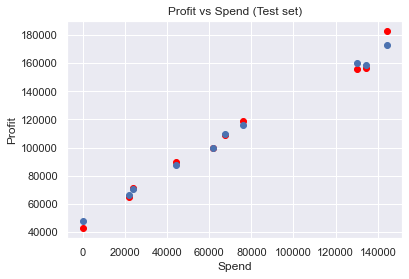

In [41]:
# Visualising the Test set results
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], mr.predict(X_test), 'bo')
plt.title('Profit vs Spend (Test set)')
plt.xlabel('Spend')
plt.ylabel('Profit')
plt.show()

Получили базовую модель для построения нейронной сети.

# Regression Neural Network

Для начала произведем шкалирование данных.

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [33]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Создаем нейронную сеть rnn, так как у нас 2 переменных значимы, то размерность входного слоя = 2. Так как модель используется для прогнозирования, следовательно архитектура должна быть расширяющей, на первом слое возьмем больше нейронов - 3.

In [34]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 3, activation = 'tanh', input_dim = 2))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 2, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=2, units=3)`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=2)`
  
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


Обучаем модель партиями по 8 объектов в течении 80 эпох.

In [35]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 80)

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/80
40/40 [==============================] - 1s 29ms/step - loss: 1.8585 - accuracy: 0.0000e+00
Epoch 2/80
40/40 [==============================] - 0s 425us/step - loss: 1.8189 - accuracy: 0.0000e+00
Epoch 3/80
40/40 [==============================] - 0s 325us/step - loss: 1.7821 - accuracy: 0.0000e+00
Epoch 4/80
40/40 [==============================] - 0s 550us/step - loss: 1.7462 - accuracy: 0.0000e+00
Epoch 5/80
40/40 [==============================] - 0s 425us/step - loss: 1.7092 - accuracy: 0.0000e+00
Epoch 6/80
40/40 [==============================] - 0s 450us/step - loss: 1.6727 - accuracy: 0.0000e+00
Epoch 7/80
40/40 [==============================] - 0s 500us/step - loss: 1.6360 - accuracy: 0.0000e+00
Epoch 8/80
40/40 [==============================] - 0s 375us/step - loss: 1.6001 - accuracy: 0.0000e+00
Epoch 9/80
40/40 [==============================] - 0s 425us/step - loss: 1.5670 - accuracy: 0.0000e+00
Epoch 10/80
40/40 [==============================] - 0s 350us/ste

40/40 [==============================] - 0s 500us/step - loss: 0.2840 - accuracy: 0.0000e+00
Epoch 80/80
40/40 [==============================] - ETA: 0s - loss: 0.1099 - accuracy: 0.0000e+ - 0s 500us/step - loss: 0.2796 - accuracy: 0.0000e+00


Строим прогноз на тестовом множестве.

In [36]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [37]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Среднеквадратическое отклонение

In [38]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

389195781.82962835

MSE в модели нейронной сети (389195781.829) возрастает по сравнения с моделью регрессии (16352028.656112641).

Визуализируем результат.

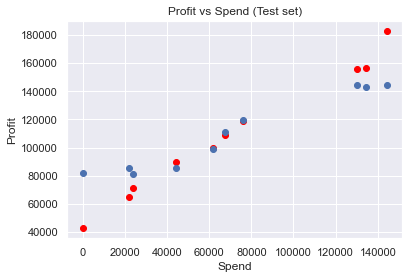

In [40]:
# Visualising the Test set results
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('Profit vs Spend (Test set)')
plt.xlabel('Spend')
plt.ylabel('Profit')
plt.show()

С имеющимися данными лучше справилась многофакторная регрессия.